# Advertising Sales Channel Prediction

## Data Set Information:

### Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored.The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

## Importing the required libraries:

In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [236]:
df = pd.read_csv('sales_advertise.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [237]:
#let remove the index column which is not needed
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [238]:
df.drop('Unnamed: 0', axis =1,inplace = True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## EDA (Exploratory Data Analysis)

In [239]:
df.shape

(200, 4)

We have 200 rows and 4 columns in this dataset

In [240]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [241]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All are float datatypes

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [243]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

We can see there are no null values in this dataset

## Descriptive analysis or summary statistics

In [244]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Insight Obtained from this Table :

Every columns is having lot of difference between 75th percentile and max, so there are outliers below lower whisker in all colmumnsm

Every columns is having lot of difference between 25th percentile and min, so there are outliers above upper whisker in all columns

Mean and median are almost same all column,so the data might be normal distributed

There are no null values in any columns

In [245]:
#skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

newspaper column is not in skewness range +0.5 to -0.5

In [246]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Tv is having higest correlation for sales with 0.78

## Data Visualization

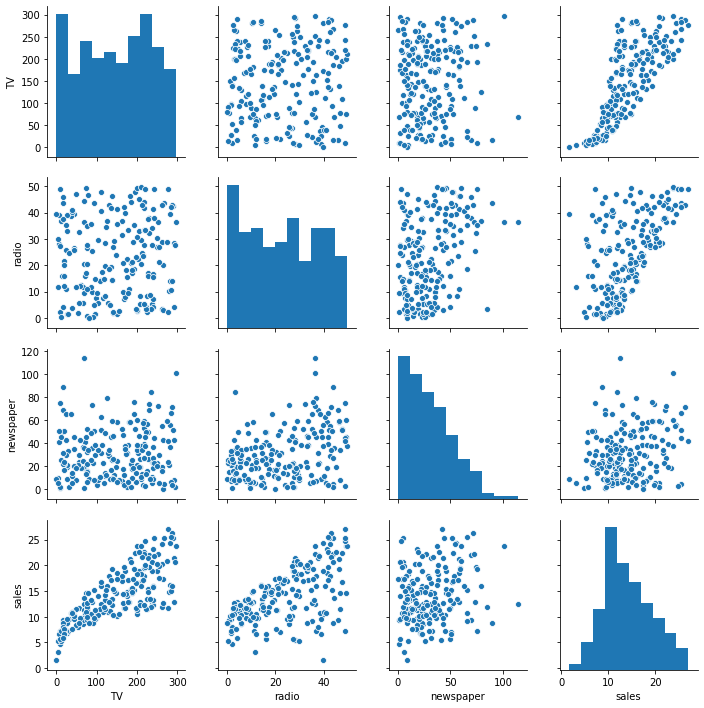

In [247]:
#Lets use Pairplot since we have only 4 columns
sns.pairplot(df)
plt.show()

### Insights Obtained From above Pairplot :

#### Univariate Analysis:

TV,Radio and Sales column are normal distributed

Newspaper colum is right skewed


#### Bivariate Analysis:

#Lets Check the scatter plot with target variable

Tv column is having high positive correlation with Target variable


Radio column is having moderate positive correlation with Target variable


newspaper column is having almost no correlation with Target variable

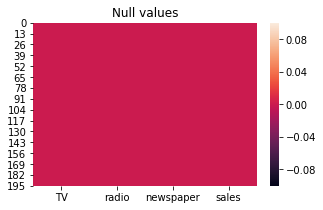

In [248]:
#checking the missing values with visualization technique
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

There are no null values in any columns

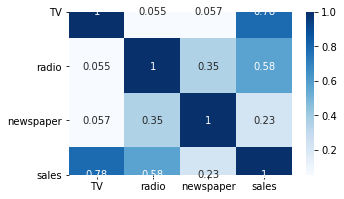

In [249]:
#correlation
fig = plt.figure(figsize=(5,3))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

Highest correlation is for TV column with sales

In [250]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['sales'].sort_values(ascending = False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

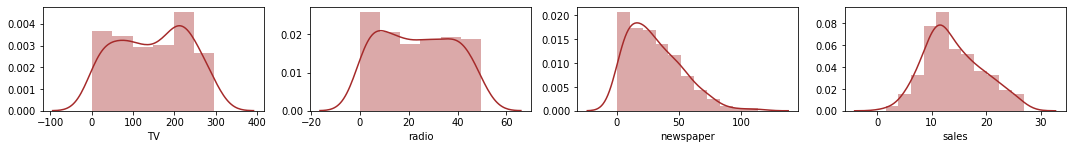

In [251]:
# Lets check the distribution
collist =df.columns
ncol = 4
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='brown')
    plt.tight_layout()

Tv, Radio, Sales columns seems almost normal distributed, Newspaper column is right skewed

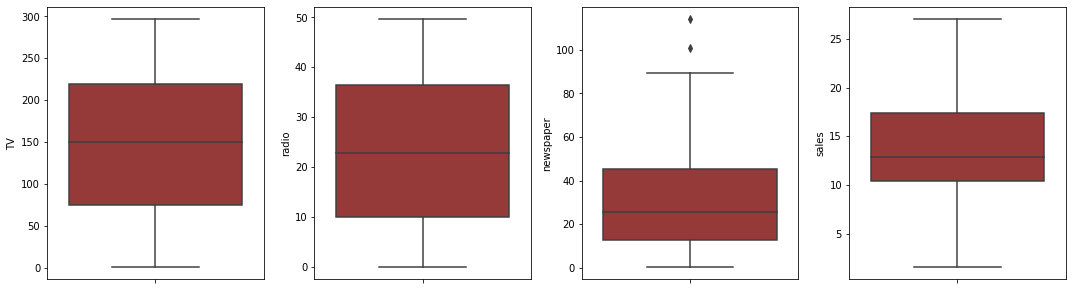

In [252]:
#outliers using box plot
# lets check for outliers among all the columns
collist =df.columns
ncol = 4
nrows = 5
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='brown',orient = 'v')
    plt.tight_layout()

There are no two outliers in news paper column, No other columns are having outliers

## Data preprocessing

## Oulier Removal:

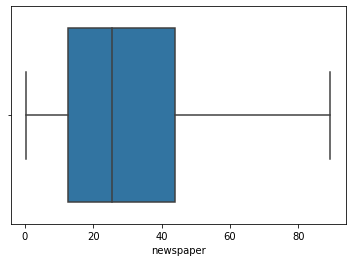

In [253]:
#there are only two outliers for this column
sns.boxplot(df_new['newspaper'])
plt.show()

In [254]:
z = np.abs(zscore(df))

In [255]:
np.where(z>3)


(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

We have found those two outliers with zscore method

In [256]:
df_new  = df[(z<3).all(axis=1)]
df_new.shape

(198, 4)

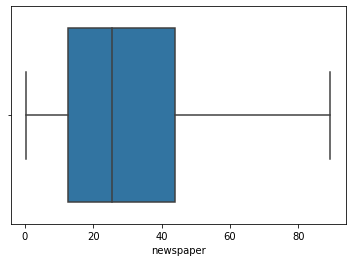

In [257]:
sns.boxplot(df_new['newspaper'])
plt.show()

### Skewness Reduction

Lets split X and Y before handing skewness

In [258]:
#lets devide X and Y before handing skewness
Y = df_new['sales']
X = df_new.drop('sales',axis = 1)

In [259]:
X.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

In [260]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = X.columns
for i in range(len(collist)):
    if X[collist[i]].skew() > 0.5:
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr 
    elif X[collist[i]].skew() < -0.5 :
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr    
    else:
        pass
X.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
dtype: float64

Now all columns are in skewsness range

## Data Scaling

In [261]:
#Lets scale the data using minmax scaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
X.head()

,TV,radio,newspaper
0,0.783202,0.762097,0.878788
1,0.149539,0.792339,0.703678
2,0.056333,0.925403,0.879435
3,0.514851,0.832661,0.806215
4,0.614886,0.217742,0.805502


Now all the data is in range of 0 and 1 after using min max scaler

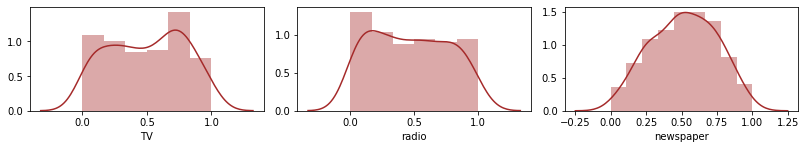

In [262]:
# Lets check the distribution
collist =X.columns
ncol = 4
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(X[collist[i]],color='brown')
    plt.tight_layout()

All the columns are normal distributed

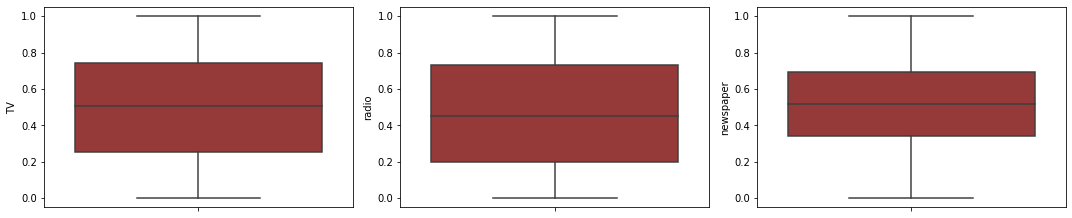

In [263]:
#outliers using box plot
# lets check for outliers among all the columns
collist = X.columns
ncol = 3
nrows = 5
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X[collist[i]],color='brown',orient = 'v')
    plt.tight_layout()

No outliers any columns

## Best random state

In [264]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state)) 

Best r2 score is 0.9431024258704839 on random state 90


In [265]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 90


In [266]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.22,random_state= 90 )

## Model selection :

In [267]:
#lets Choose Among this Five Models
lr = LinearRegression()
svr = SVR()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [268]:
#checking each model with Cross val score
model_list = [lr,knn,svr,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,X,Y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.sqrt(r2_score(y_test,pred))-cvs.mean()
    print('Diffrence between cross val score and root mean squared error is :',difference)
    least_difference.append((m,difference))



LinearRegression()
Scores :
r2 score: 0.9431024258704839
Cross Val score : 0.8857739370001966
Error :
mean absolute error : 1.041560430234742
mean squared error :  1.6136304847193506
root mean squared error : 1.2702875598538115
Difference :
Diffrence between cross val score and root mean squared error is : 0.08536067049275231


KNeighborsRegressor()
Scores :
r2 score: 0.9389106952530057
Cross Val score : 0.9407052322824345
Error :
mean absolute error : 0.9236363636363639
mean squared error :  1.7325090909090906
root mean squared error : 1.31624811145509
Difference :
Diffrence between cross val score and root mean squared error is : 0.028268810328101912


SVR()
Scores :
r2 score: 0.9336558304856777
Cross Val score : 0.91278463451271
Error :
mean absolute error : 0.8131264234694595
mean squared error :  1.8815384671411344
root mean squared error : 1.3716918265926696
Difference :
Diffrence between cross val score and root mean squared error is : 0.05347404228438746


RandomForestRegress

In [269]:
#checking out least diffrence b/w r2score and cross val score
least_difference

[(LinearRegression(), 0.08536067049275231),
 (KNeighborsRegressor(), 0.028268810328101912),
 (SVR(), 0.05347404228438746),
 (RandomForestRegressor(), 0.01342856517703539),
 (AdaBoostRegressor(), 0.02439495126274993)]

Lets choose random Forest as our final model since it is having least diffrence betwen cross val score and R2 score

## Hyperparameter Tuning

In [270]:
# lets create the parameter list to pass in GridsearchCv

parameters = {'n_estimators' : [100,200,300,400,500,600,700,800],'criterion':['mse','mae'],'max_depth':[3,4,5,6,7,8,10,25],
             'min_samples_split':[2,5,8,10,12,18],'max_features':['auto','sqrt'],'min_samples_leaf':[1,3,5,6,7]}
gsv = RandomizedSearchCV(estimator= rf,param_distributions=  parameters,cv =5)
gsv.fit(x_train,y_train)
gsv.best_score_

0.9580172473163777

In [271]:
gsv.best_params_

{'n_estimators': 600,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 8,
 'criterion': 'mse'}

Our default values are giving more r2 score

## Creating a Final Model as Random Forest:

In [272]:
final_mod = RandomForestRegressor()
final_mod.fit(x_train,y_train)
final_pred = final_mod.predict(x_test)
cvs = cross_val_score(m,X,Y,cv =5)
print('Score')
print('R2_score :',r2_score(y_test,final_pred))
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))

Score
R2_score : 0.9803162061054744


Error :
mean absolute error : 0.6266818181818177
mean squared error :  0.5582376818181809


## Saving the model:

In [273]:
#using joblib for serialization
import joblib
joblib.dump(final_mod,'advertise_final.obj')

['advertise_final.obj']

In [274]:
advertise_final = joblib.load('advertise_final.obj')

In [275]:
pred = advertise_final.predict(x_test)
r2_score(y_test,pred)

0.9803162061054744

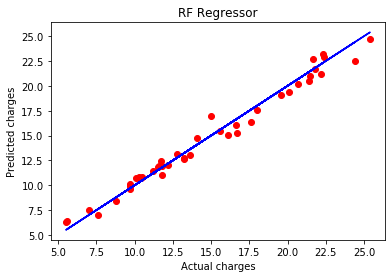

In [276]:
plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = final_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('RF Regressor')
plt.show()

Almost all the line is covered

## conclusion

In [277]:
conclusion = pd.DataFrame((advertise_final.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])

In [278]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Predicted,17.619,6.435,23.163,19.119,16.019,21.21,20.945,12.688,22.886,8.366,...,9.95,11.912,9.62,12.481,15.27,15.076,19.336,11.863,12.737,16.975
Actual,18.000,5.600,22.300,19.600,16.600,22.20,21.500,13.200,22.400,8.800,...,9.70,11.800,9.70,11.700,16.70,16.100,20.100,11.500,13.200,15.000


Almost all the values are very close